<a href="https://colab.research.google.com/github/febrinata23/training_ds/blob/main/Module_4_2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression

## 1.1 Library Installation & Setup

In [ ]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [ ]:
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
%matplotlib inline

import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

import warnings
import sys
import os

## 1.2 Load Dataset

In [ ]:
# Download Data
gdrive_url = "https://drive.google.com/file/d/1jAFn03vk055D9gZrrzM70_cdPyUDg-bv/view"
file_name = 'churn_data.csv'
gdown.download(gdrive_url, file_name, fuzzy=True)


Downloading...
From: https://drive.google.com/uc?id=1jAFn03vk055D9gZrrzM70_cdPyUDg-bv
To: /content/churn_data.csv
100%|██████████| 977k/977k [00:00<00:00, 10.6MB/s]


'churn_data.csv'

In [ ]:
df = pd.read_csv('churn_data.csv')

In [ ]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [ ]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
df['Churn'].value_counts(normalize = True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [ ]:
df['Churn'] = (df['Churn'] == 'Yes').astype(int)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

features = numeric_features + categorical_features
target = 'Churn'

print("numeric_features : ", numeric_features)
print("categorical_features : ", categorical_features)
print("features: ", features)
print("target: ", target)
print("columns used: ", features + [target])


numeric_features :  ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features :  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
features:  ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
target:  Churn
columns used:  ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
df = df[ features + [target] ]


In [ ]:
# Handle missing value on TotalCharges with value 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Handle Categorical Data
## we transform categorical into several column as it will treated differently
df = pd.get_dummies(df, columns = categorical_features)


<ipython-input-14-ef1dfd86de7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].fillna(0)


## 1.4 Train & test data splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1),
                                                   df['Churn'],
                                                   test_size=0.2,
                                                   random_state=1234)

x_train.shape, x_test.shape

((5634, 46), (1409, 46))

In [ ]:
x_train.dtypes

tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                                 bool
gender_Male                                   bool
SeniorCitizen_0                               bool
SeniorCitizen_1                               bool
Partner_No                                    bool
Partner_Yes                                   bool
Dependents_No                                 bool
Dependents_Yes                                bool
PhoneService_No                               bool
PhoneService_Yes                              bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No              

## 1.6 Data Standardization

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

## 1.7 Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
Logistic_model = SequentialFeatureSelector(estimator=LogisticRegression(random_state=0),
                                    n_features_to_select=6,
                                    direction='forward',
                                    scoring='roc_auc',
                                    cv=5)

Logistic_model.fit(x_train,y_train)

SequentialFeatureSelector(estimator=LogisticRegression(random_state=0),
                          n_features_to_select=6, scoring='roc_auc')

In [ ]:
Logistic_model.get_feature_names_out()

array(['x0', 'x2', 'x17', 'x19', 'x37', 'x44'], dtype=object)

In [ ]:
x_train = Logistic_model.transform(x_train)
x_test = Logistic_model.transform(x_test)

In [ ]:
log_reg = LogisticRegression(random_state=0)

log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

## 1.8 Accuracy Testing

In [ ]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1046
           1       0.60      0.49      0.54       363

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



[[927 119]
 [184 179]]


0.7849538679914834


1. Means the accuracy of the model is 0.78 (78%) means it correctly classified 62% of the 1409 observations

2. The weighted average F1-score (0.78) and weighted average precision (0.78) provide a more nuanced view, taking into account class imbalance (if present). These metrics suggest the model performs slightly better for the majority class (potentially class 0)

3. Class 0: The model has a precision of 0.83 for class 0, meaning 83% of the predicted class 0 instances were actually class 0. It also has a recall of 0.83, indicating that the model captured 83% of the actual class 0 instances. The F1-score of 0.86 suggests a balanced performance for class 0.
4. Class 1: The model struggles more with class 1. The precision is only 0.60, meaning that only 60% of the predicted class 1 instances were truly class 1. The recall of 0.49 indicates that the model missed 49% of the actual class 1 instances. The F1-score of 0.54 highlights the lower performance for class 1.

#Decision Tree

##Decision Tree Example

### 2.1. Install and Import Requirements

In [ ]:
!pip install -q dtreeviz

In [ ]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
import logging
import dtreeviz
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

import warnings
import sys
import os

### 2.2. Prepare Data

In [ ]:
# Download Data
gdrive_url = "https://drive.google.com/file/d/1-gDioC22iAExZkezm9LwxYl5xPeVhdeZ/view"
file_name = 'titanic.csv'
gdown.download(gdrive_url, file_name, fuzzy=True)
random_state = 1234

Downloading...
From: https://drive.google.com/uc?id=1-gDioC22iAExZkezm9LwxYl5xPeVhdeZ
To: /content/titanic.csv
100%|██████████| 60.3k/60.3k [00:00<00:00, 27.7MB/s]


In [ ]:
df = pd.read_csv("titanic.csv")

In [ ]:
# Fill missing values for Age
df["Age"] = df["Age"].fillna(df['Age'].mean())

# Encode categorical variables
df["Sex_label"] = df['Sex'].astype("category").cat.codes
df["Cabin_label"] = df['Cabin'].astype("category").cat.codes
df["Embarked_label"] = df['Embarked'].astype("category").cat.codes

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_label,Cabin_label,Embarked_label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,-1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,81,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,-1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,55,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,-1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        889 non-null    object 
 12  Sex_label       891 non-null    int8   
 13  Cabin_label     891 non-null    int16  
 14  Embarked_label  891 non-null    int8   
dtypes: float64(2), int16(1), int64(5), int8(2), object(5)
memory usage: 87.1+ KB


### 2.3. Visualize Classifiers

In [ ]:
features = ["Age", "Sex_label", "Fare", "Pclass"]
target = "Survived"

# initiate model
tree_classifier = DecisionTreeClassifier(max_depth=3, random_state=random_state)

# Train model
tree_classifier.fit(df[features].values, df[target].values)

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [ ]:
viz_model = dtreeviz.model(tree_classifier,
                           X_train=df[features], y_train=df[target],
                           feature_names=features,
                           target_name=target, class_names=["perish", "survive"])

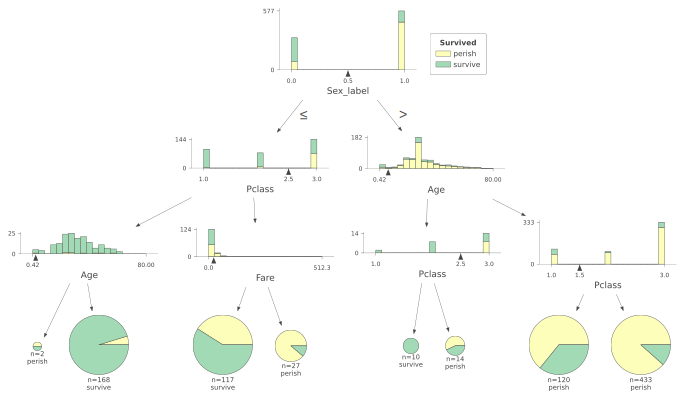

In [ ]:
viz_model.view()

In [ ]:
one_sample = df[features].iloc[100]
one_sample

Age          28.0000
Sex_label     0.0000
Fare          7.8958
Pclass        3.0000
Name: 100, dtype: float64

/usr/local/lib/python3.10/dist-packages/dtreeviz/models/shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/usr/local/lib/python3.10/dist-packages/dtreeviz/trees.py:1231: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


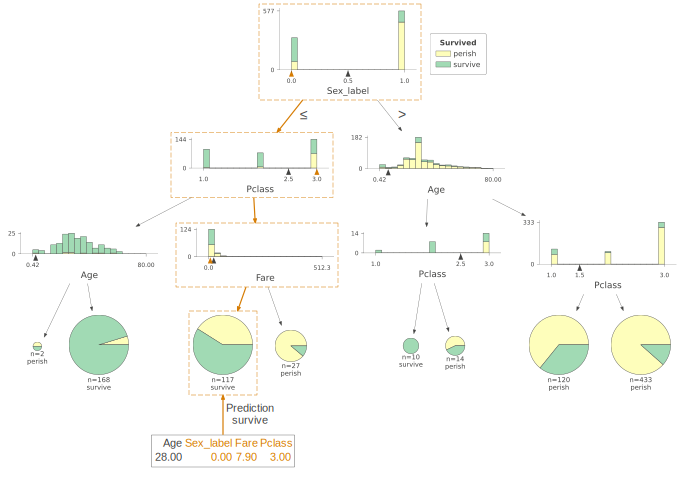

In [ ]:
viz_model.view(x=one_sample)

/usr/local/lib/python3.10/dist-packages/dtreeviz/models/shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/usr/local/lib/python3.10/dist-packages/dtreeviz/trees.py:1231: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


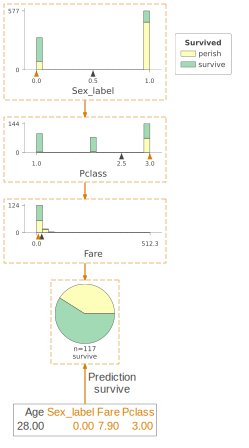

In [ ]:
viz_model.view(x=one_sample, show_just_path=True)

In [ ]:
print(viz_model.explain_prediction_path(one_sample))

Sex_label < 0.5
Fare < 23.35
2.5 <= Pclass 



/usr/local/lib/python3.10/dist-packages/dtreeviz/models/shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/usr/local/lib/python3.10/dist-packages/dtreeviz/interpretation.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


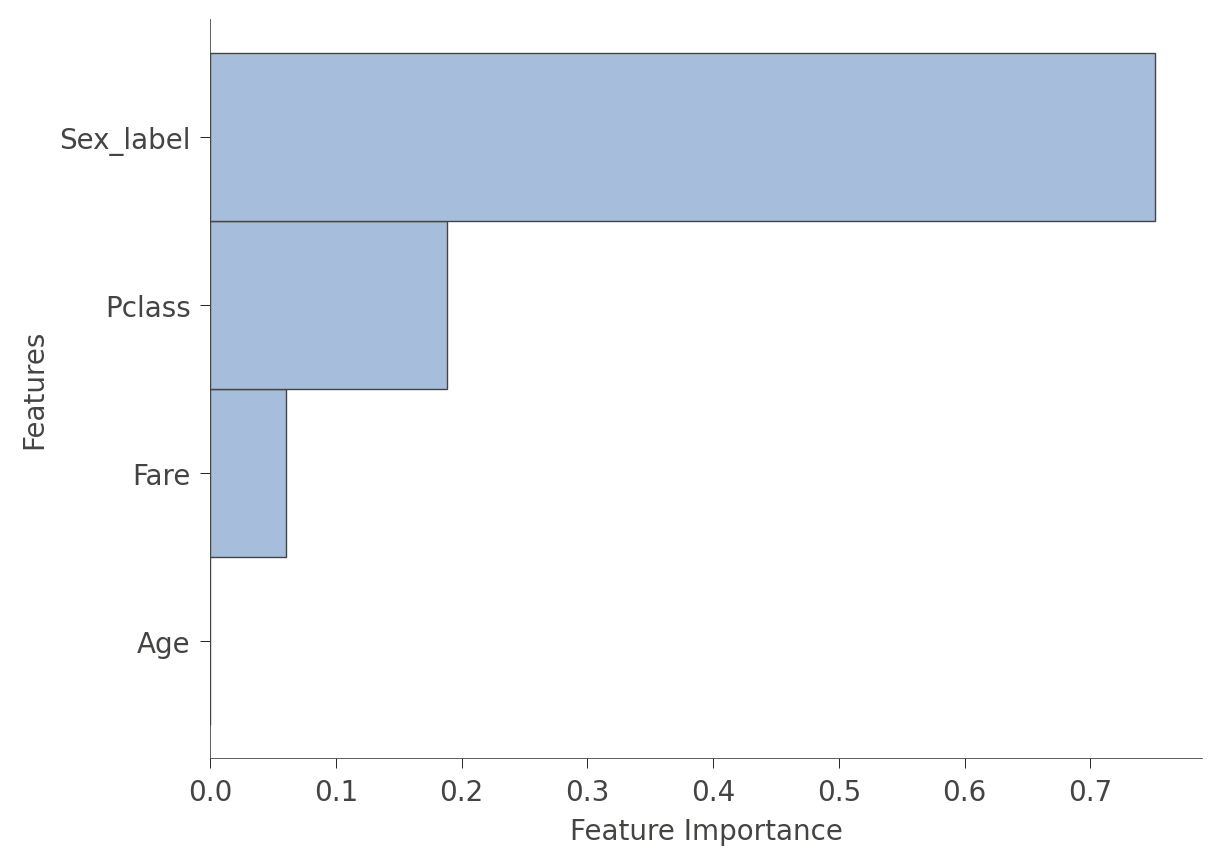

In [ ]:
viz_model.instance_feature_importance(one_sample)

### 2.4 Visualize Regressors
To demonstrate regressor tree visualization, we start by creating a regressors model that predicts age instead of survival:

In [ ]:
features_reg = ["Sex_label", "Fare", "Survived", "Pclass"]
target_reg = "Age"

tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="absolute_error")
tree_regressor.fit(df[features_reg].values, df[target_reg].values)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      random_state=1234)

In [ ]:
viz_rmodel = dtreeviz.model(model=tree_regressor,
                            X_train=df[features_reg],
                            y_train=df[target_reg],
                            feature_names=features_reg,
                            target_name=target_reg)

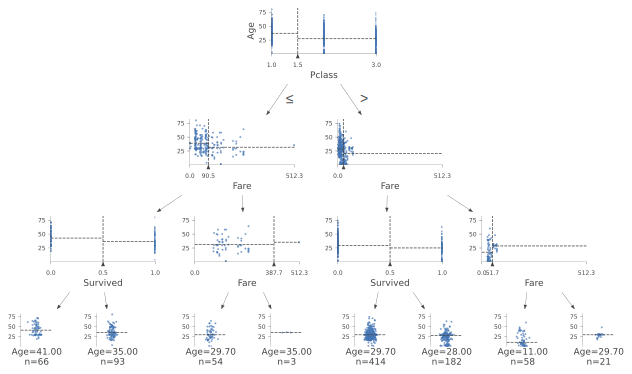

In [ ]:
viz_rmodel.view()

In [ ]:
one_sample = df[features_reg].iloc[100]
one_sample

Sex_label    0.0000
Fare         7.8958
Survived     0.0000
Pclass       3.0000
Name: 100, dtype: float64

/usr/local/lib/python3.10/dist-packages/dtreeviz/models/shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/usr/local/lib/python3.10/dist-packages/dtreeviz/trees.py:1324: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


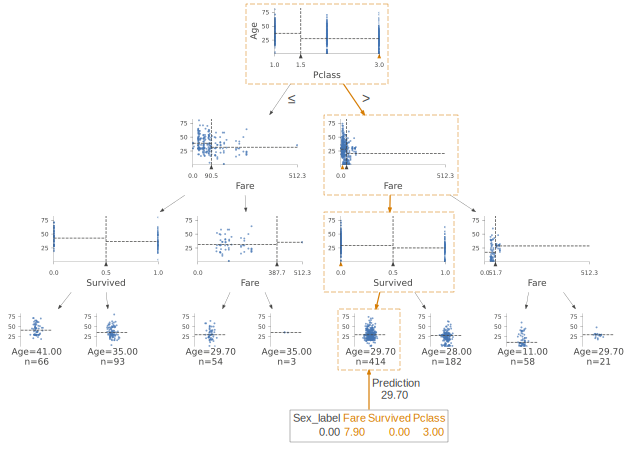

In [ ]:
viz_rmodel.view(x = one_sample)

/usr/local/lib/python3.10/dist-packages/dtreeviz/models/shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/usr/local/lib/python3.10/dist-packages/dtreeviz/trees.py:1324: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


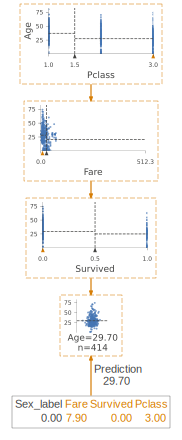

In [ ]:
viz_rmodel.view(x = one_sample, show_just_path=True)

### 2.5 Exercise: Explore yourself

Add more variable into decision tree (but numeric variable only)

Add more max_depth

can choose to use classifier or regressors

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_label',
       'Cabin_label', 'Embarked_label'],
      dtype='object')

In [ ]:
#Please create Decision tree using all the metrics that is numeric using existing Dataframe




In [ ]:
#create the visualization here



## 3. feature Processing

###3.1 Data Inspection

In [ ]:
# reload the data to get un edited data
df = pd.read_csv("titanic.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
numeric_features = ["Age", "SibSp", "Parch", "Fare"]
categorical_features = ["Pclass", "Sex", "Embarked"]
features = numeric_features + categorical_features
target = 'Survived'

print("numeric_features : ", numeric_features)
print("categorical_features : ", categorical_features)
print("features: ", features)
print("target: ", target)
print("columns used: ", features + [target])

numeric_features :  ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features :  ['Pclass', 'Sex', 'Embarked']
features:  ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Sex', 'Embarked']
target:  Survived
columns used:  ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Sex', 'Embarked', 'Survived']


In [ ]:
df = df[ features + [target] ]

In [ ]:
df.head()

,Age,SibSp,Parch,Fare,Pclass,Sex,Embarked,Survived
0,22.0,1,0,7.2500,3,male,S,0
1,38.0,1,0,71.2833,1,female,C,1
2,26.0,0,0,7.9250,3,female,S,1
3,35.0,1,0,53.1000,1,female,S,1
4,35.0,0,0,8.0500,3,male,S,0


### 3.2 numerical Features

In [ ]:
# Handle missing value ('Age Column')
## we need to store the value to be inputed in missing data so we can reused it again
median_of_Age = df['Age'].median()

print("median_of_Age : ", median_of_Age)

df['Age'] = df['Age'].fillna(median_of_Age)

median_of_Age :  28.0


<ipython-input-78-b9c783a2674e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### 3.3 Categorical Features

In [ ]:
# Handle Categorical Data
## we transform categorical into several column as it will treated differently
df = pd.get_dummies(df, columns = categorical_features)

###3.4 Train Model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


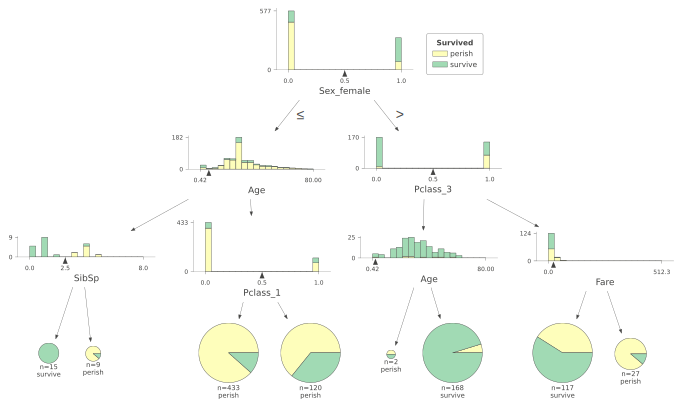

In [ ]:
features = ["Age", "SibSp", "Parch", "Fare", "Pclass_1", "Pclass_2", "Pclass_3",
            "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S"]
target = "Survived"

# initiate model
model = DecisionTreeClassifier(max_depth=3, random_state=random_state)
# Train model
model.fit(df[features], df[target])

viz_model = dtreeviz.model(model,
                           X_train=df[features], y_train=df[target],
                           feature_names=features,
                           target_name=target, class_names=["perish", "survive"])

viz_model.view()

## 4. Model Evaluation

![Confusion metrics](https://miro.medium.com/v2/resize:fit:974/1*H_XIN0mknyo0Maw4pKdQhw.png)

![metric example](https://www.kdnuggets.com/wp-content/uploads/performance-evaluation-metrics-classification.jpg)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
prediction = model.predict(df[features])

In [ ]:
prediction[:20]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
label = df[target].values

In [ ]:
label[:20]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [ ]:
print("accuracy_score \t:" ,accuracy_score(label, prediction))
print("precision_score\t:" ,precision_score(label, prediction))
print("recall_score \t:" ,recall_score(label, prediction))
print("f1_score \t:" ,f1_score(label, prediction))

print("confusion_matrix:")
confusion_matrix(label, prediction)

accuracy_score 	: 0.8271604938271605
precision_score	: 0.8133333333333334
recall_score 	: 0.7134502923976608
f1_score 	: 0.7601246105919003
confusion_matrix:


array([[493,  56],
       [ 98, 244]])

Comparing if we only use **baseline** prediction if Female then survive

In [ ]:
df.head()

,Age,SibSp,Parch,Fare,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,False,False,True,False,True,False,False,True
1,38.0,1,0,71.2833,1,True,False,False,True,False,True,False,False
2,26.0,0,0,7.9250,1,False,False,True,True,False,False,False,True
3,35.0,1,0,53.1000,1,True,False,False,True,False,False,False,True
4,35.0,0,0,8.0500,0,False,False,True,False,True,False,False,True


In [ ]:
baseline_prediction = df['Sex_female'].astype(int).values

In [ ]:
baseline_prediction[:20]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
print("accuracy_score \t:" ,accuracy_score(label, baseline_prediction))
print("precision_score\t:" ,precision_score(label, baseline_prediction))
print("recall_score \t:" ,recall_score(label, baseline_prediction))
print("f1_score \t:" ,f1_score(label, baseline_prediction))

print("confusion_matrix:")
confusion_matrix(label, baseline_prediction)

accuracy_score 	: 0.7867564534231201
precision_score	: 0.7420382165605095
recall_score 	: 0.6812865497076024
f1_score 	: 0.7103658536585366
confusion_matrix:


array([[468,  81],
       [109, 233]])

### 4.2. Data Splitting before evaluation

In machine learning, to evaluate the model performance fairly, we need to evaluate it using `unseen data` which the data that not in training phase, commonly we call it `test data`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=random_state)

In [ ]:
df.shape

(891, 13)

In [ ]:
df_train.shape

(596, 13)

In [ ]:
df_test.shape

(295, 13)

In [ ]:
df_train.head()

,Age,SibSp,Parch,Fare,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
853,16.0,0,1,39.4000,1,True,False,False,True,False,False,False,True
115,21.0,0,0,7.9250,0,False,False,True,False,True,False,False,True
647,56.0,0,0,35.5000,1,True,False,False,False,True,True,False,False
232,59.0,0,0,13.5000,0,False,True,False,False,True,False,False,True
352,15.0,1,1,7.2292,0,False,False,True,False,True,True,False,False


In [ ]:
df_test.head()

,Age,SibSp,Parch,Fare,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
523,44.0,0,1,57.9792,1,True,False,False,True,False,True,False,False
778,28.0,0,0,7.7375,0,False,False,True,False,True,False,True,False
760,28.0,0,0,14.5000,0,False,False,True,False,True,False,False,True
496,54.0,1,0,78.2667,1,True,False,False,True,False,True,False,False
583,36.0,0,0,40.1250,0,True,False,False,False,True,True,False,False


notice the index is not start from 0, but it randomized due to train test split

In [ ]:
features = ["Age", "SibSp", "Parch", "Fare", "Pclass_1", "Pclass_2", "Pclass_3",
            "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S"]
target = "Survived"

# initiate model
model = DecisionTreeClassifier(max_depth=3, random_state=random_state)
# Train model
model.fit(df_train[features], df_train[target]) # no longer use df, but df_train

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [ ]:
prediction = model.predict(df_test[features]) # no longer use df, but df_test
label = df_test[target].values # no longer use df, but df_test

In [ ]:
print("accuracy_score \t:" ,accuracy_score(label, prediction))
print("precision_score\t:" ,precision_score(label, prediction))
print("recall_score \t:" ,recall_score(label, prediction))
print("f1_score \t:" ,f1_score(label, prediction))

print("confusion_matrix:")
confusion_matrix(label, prediction)

accuracy_score 	: 0.823728813559322
precision_score	: 0.7941176470588235
recall_score 	: 0.7232142857142857
f1_score 	: 0.7570093457943925
confusion_matrix:


array([[162,  21],
       [ 31,  81]])

In practice we comparing training data performance and test data performance as well to see overfitting or underfitting

In [ ]:
y_pred_train = model.predict(df_train[features])
y_true_train = df_train[target].values

y_pred_test = model.predict(df_test[features])
y_true_test = df_test[target].values


In [ ]:
print("accuracy train \t:" ,accuracy_score(y_true_train, y_pred_train))
print("accuracy test \t:" ,accuracy_score(y_true_test, y_pred_test))


accuracy train 	: 0.8271812080536913
accuracy test 	: 0.823728813559322


### 4.3 Exercise: Explore yourself
Lets try different `features`, `Model parameter`, `Model` Etc.

And still using the same `df_train` & `df_test` above.

which configuration will yield the best `accuracy test` ?

# Gradient Boosting

In [ ]:
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
%matplotlib inline

import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

import warnings
import sys
import os

## 1.2 Load Dataset

In [ ]:
# Download Data
gdrive_url = "https://drive.google.com/file/d/1jAFn03vk055D9gZrrzM70_cdPyUDg-bv/view"
file_name = 'churn_data.csv'
gdown.download(gdrive_url, file_name, fuzzy=True)


Downloading...
From: https://drive.google.com/uc?id=1jAFn03vk055D9gZrrzM70_cdPyUDg-bv
To: /content/churn_data.csv
100%|██████████| 977k/977k [00:00<00:00, 105MB/s]


'churn_data.csv'

In [ ]:
df = pd.read_csv('churn_data.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [ ]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
df['Churn'].value_counts(normalize = True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [ ]:
df['Churn'] = (df['Churn'] == 'Yes').astype(int)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

features = numeric_features + categorical_features
target = 'Churn'

print("numeric_features : ", numeric_features)
print("categorical_features : ", categorical_features)
print("features: ", features)
print("target: ", target)
print("columns used: ", features + [target])


numeric_features :  ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features :  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
features:  ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
target:  Churn
columns used:  ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
df = df[ features + [target] ]


In [ ]:
# Handle missing value on TotalCharges with value 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Handle Categorical Data
## we transform categorical into several column as it will treated differently
df = pd.get_dummies(df, columns = categorical_features)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1),
                                                   df['Churn'],
                                                   test_size=0.2,
                                                   random_state=1234)

x_train.shape, x_test.shape

((5634, 46), (1409, 46))

In [ ]:
x_train.dtypes

tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                                 bool
gender_Male                                   bool
SeniorCitizen_0                               bool
SeniorCitizen_1                               bool
Partner_No                                    bool
Partner_Yes                                   bool
Dependents_No                                 bool
Dependents_Yes                                bool
PhoneService_No                               bool
PhoneService_Yes                              bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No              

## 1.6 Modeling

In [ ]:
from sklearn.preprocessing import RobustScaler
Scaler = RobustScaler()
Scaler.fit_transform(x_train)
Scaler.transform(x_test)

array([[ 0.26086957,  0.07915809,  0.50686873, ...,  0.        ,
         0.        ,  0.        ],
       [-0.26086957, -0.06634637, -0.09090032, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.63043478, -0.83870968,  0.03403567, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.06521739,  0.69229009,  0.60847107, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.04347826,  0.60626859,  0.49968458, ...,  0.        ,
         1.        ,  0.        ],
       [-0.45652174, -0.49370853, -0.3003837 , ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
from xgboost import XGBClassifier
XGBC = XGBClassifier()
XGBC.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = XGBC.predict(x_test)

## 1.7 Accuracy Testing

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
XGBC_Recall = recall_score(y_test, y_pred)
XGBC_Precision = precision_score(y_test, y_pred)
XGBC_f1 = f1_score(y_test, y_pred)
XGBC_accuracy = accuracy_score(y_test, y_pred)
XGBC_roc_auc = roc_auc_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print('Recall: %f' % (XGBC_Recall))
print('Precision: %f' % (XGBC_Precision))
print('f1: %f' % (XGBC_f1))
print('Accuracy: %f' % (XGBC_accuracy))
print('roc: %f' % (XGBC_roc_auc))

Recall: 0.495868
Precision: 0.564263
f1: 0.527859
Accuracy: 0.771469
roc: 0.681490


## 1.8 Optimized

In [ ]:
from sklearn.model_selection import cross_val_score
import statistics as std

score = cross_val_score(XGBC, x_train, y_train, cv=5, scoring='recall', error_score="raise")
XGBC_cv_score = score.mean()
XGBC_cv_stdev = std.stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', XGBC_cv_score)
print('Cross Validation Recall standard deviation: ', XGBC_cv_stdev)

Cross Validation Recall scores are: [0.52159468 0.51495017 0.55149502 0.52980132 0.52491694]
Average Cross Validation Recall score:  0.5285516270269082
Cross Validation Recall standard deviation:  0.013915554098728295


In [ ]:
ndf = [(XGBC_Recall, XGBC_Precision, XGBC_f1, XGBC_accuracy, XGBC_roc_auc, XGBC_cv_score, XGBC_cv_stdev)]

XGBC_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'ROC-AUC Score', 'Avg CV Recall', 'Standard Deviation of CV Recall'])
XGBC_score.insert(0, 'Model', 'XGBC')
XGBC_score

,Model,Recall,Precision,F1 Score,Accuracy,ROC-AUC Score,Avg CV Recall,Standard Deviation of CV Recall
0,XGBC,0.495868,0.564263,0.527859,0.771469,0.68149,0.528552,0.013916
